In [2]:
pip install cirq

     |████████████████████████████████| 1.6 MB 4.0 MB/s 
     |████████████████████████████████| 47 kB 1.8 MB/s 
     |████████████████████████████████| 437 kB 44.5 MB/s 
     |████████████████████████████████| 328 kB 48.1 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 145 kB 53.0 MB/s 
     |████████████████████████████████| 52 kB 1.0 MB/s 
     |████████████████████████████████| 10.1 MB 44.3 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 220 kB 63.6 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 229 kB 54.5 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 243 kB 55.9 MB/s 
     |████████████████████████

In [6]:
import cirq
from cirq import X
import random
import numpy as np
import time
import matplotlib.pyplot as plt

"""This Code is capable of customizing Grover's Algorithm for n-qubits"""
##############################################################################
#################################  SECTION 1  ################################
##############################################################################


"""Function Implementing Grovers Algorithm""" 
def grover_implementation(nqubits, qubits, control_qubit, marked_bitsring):
    circuit = cirq.Circuit()

    # Create an equal superposition over input qubits
    circuit.append(cirq.H.on_each(*qubits))
    
    # Put the output qubit in the |-⟩ state
    circuit.append([cirq.X(control_qubit), cirq.H(control_qubit)])

    # Calculating the number of iterations required
    N=2**nqubits
    iterations = round((((np.pi/4)*np.sqrt(N))-0.5))
    print("iterations", iterations)

    """Iterating the ALgorithm """ 
    for i in range(iterations):    
        
        # Create the oracle
        circuit.append(cirq.X(q) for (q, bit) in zip(qubits, marked_bitsring) if not bit)
    
        # Create the Toffoli Gate
        circuit.append(X.controlled(nqubits).on(*qubits[:nqubits], control_qubit))

        # Negate zero bits (if necessary)
        circuit.append(cirq.X(q) for (q, bit) in zip(qubits, marked_bitsring) if not bit)
        
        # Construct the Grover operator
        circuit.append(cirq.H.on_each(*qubits))
        circuit.append(cirq.X.on_each(*qubits))
            
        circuit.append(cirq.H.on(qubits[nqubits-1]))
        circuit.append(X.controlled(nqubits-1).on(*qubits[:nqubits-1], qubits[nqubits-1]))
        circuit.append(cirq.H.on(qubits[nqubits-1]))
    
        circuit.append(cirq.X.on_each(*qubits))
        circuit.append(cirq.H.on_each(*qubits))

    # Measure the n-Qubits 
    circuit.append(cirq.measure(*qubits, key="result"))

    return circuit

# Helper function
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

##############################################################################
#################################  SECTION 2  ################################
##############################################################################
def main(nqubits):

    """Creating a random input for the n-qubit array"""
    # Number of qubits
    
    
    # Create Qubit Registers 
    qubits = cirq.LineQubit.range(nqubits)
    control_qubit = cirq.NamedQubit("Control")
    #Create a random marked bitstring """
    marked_bitsring = [random.randint(0, 1) for _ in range(nqubits)]
    print(f"Marked bitstring: {marked_bitsring}")
    
    ##############################################################################
    #################################  SECTION 3  ################################
    ##############################################################################
    
    """Create the circuit for Grover's algorithm"""
    circuit = grover_implementation(nqubits, qubits, control_qubit, marked_bitsring)
    print("Circuit for Grover's algorithm:")
    print(circuit)
    
    ##############################################################################
    #################################  SECTION 4  ################################
    ##############################################################################
    
    """Simulate the circuit createted for Grover's algorithm and check the output"""
    
    
    # Simultate the ciruit for multiple repetations
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1024)
    
    # Analyze the measured bitstrings
    frequencies = result.histogram(key="result", fold_func=bitstring)
    print('\nSampled results:\n{}'.format(frequencies))
    
    # Check if most of the output measurement match the input bitstring
    most_common_bitstring = frequencies.most_common(1)[0][0]
    print("\nMost Common Output: {}".format(most_common_bitstring))
    print("Result matches with Marked Bitstring: {}".format(most_common_bitstring == bitstring(marked_bitsring)))
    

#print(t)
    
    
    

    
    

In [7]:

t=[]
for i in range(1,21):
    
    st=time.time()
    main(i)
    end=time.time()
    t.append(end-st)



Marked bitstring: [1]
iterations 1
Circuit for Grover's algorithm:
0: ─────────H───────@───H───X───H───X───H───X───H───M('result')───
                    │
Control: ───X───H───X─────────────────────────────────────────────

Sampled results:
Counter({'0': 526, '1': 498})

Most Common Output: 0
Result matches with Marked Bitstring: False
Marked bitstring: [0, 0]
iterations 1
Circuit for Grover's algorithm:
0: ─────────H───X───@───X───H───X───────@───X───H───────M('result')───
                    │                   │               │
1: ─────────H───X───@───X───H───X───H───X───H───X───H───M─────────────
                    │
Control: ───X───H───X─────────────────────────────────────────────────

Sampled results:
Counter({'00': 1024})

Most Common Output: 00
Result matches with Marked Bitstring: True
Marked bitstring: [1, 0, 1]
iterations 2
Circuit for Grover's algorithm:
0: ─────────H───────@───H───X───────@───X───H───────@───H───X───────@───X───H───────M('result')───
                    

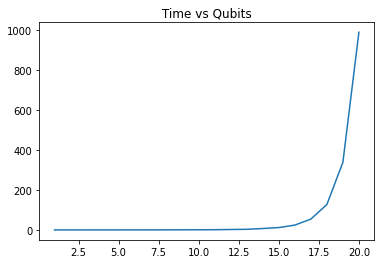

In [10]:

plt.plot(list(range(1,21)), t)
plt.title(" Time vs Qubits ")
plt.show()